In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import re

RUN_RE = re.compile(r"Running (\d+) child.*, (\d+) stream.*")
THROUGHPUT_RE = re.compile(r"Found sustainable candidate \((\d+) events/s.\)*")
BENCHMARK_RE = re.compile(r"BENCHMARK: WINDOWS: (.*) - AGG_FNS: (.*)")

def parse_log_file(log_file):
    sustainable_throughputs = {}
    
    current_bm = None
    current_run = None
    current_throughput = None
    with open(log_file) as f:
        for line in f:
            benchmark_match = BENCHMARK_RE.match(line)
            if benchmark_match is not None:
                current_bm = (benchmark_match.group(1), benchmark_match.group(2))
                sustainable_throughputs[current_bm] = {}
                current_throughput = None
                print(current_bm)
            
            run_match = RUN_RE.match(line)
            if run_match is not None:
                if current_run != None:
                    print(f"Did not find candidate line for {current_run}")
                current_run = (int(run_match.group(1)), int(run_match.group(2)))
                current_throughput = None
                print(current_run)

            throughput_match = THROUGHPUT_RE.match(line)
            if throughput_match is not None:
                if current_throughput is not None:
                    print(f"Did not find run line after {current_run}")
                current_throughput = int(throughput_match.group(1))
                sustainable_throughputs[current_bm][current_run] = current_throughput
                current_run = None
                
    if current_run is not None:
        print(f"Did not find candidate line for {current_run}")
                
    return sustainable_throughputs
                
def get_all_throughputs(log_path):
    all_throughputs = {}
    for log_file in sorted(os.listdir(log_path)):
        if log_file.endswith(".log"):
            print(f"Parsing {log_file}")
            sustainable_throughputs = parse_log_file(os.path.join(log_path, log_file))
            print(f"current: {sustainable_throughputs}")
            all_throughputs = {**all_throughputs, **sustainable_throughputs}
            print(f"all:     {all_throughputs}\n")
    return all_throughputs

In [47]:
CONCURRENT_PATH = "/Users/law/repos/ma/benchmark-runs/concurrent_tumbling"
CONCURRENT_TP = get_all_throughputs(CONCURRENT_PATH)

MATRIX_PATH_1 = "/Users/law/repos/ma/benchmark-runs/matrix_run"
MATRIX_TP_1 = get_all_throughputs(MATRIX_PATH_1)
MATRIX_PATH_2 = "/Users/law/repos/ma/benchmark-runs/matrix_median"
MATRIX_TP_2 = get_all_throughputs(MATRIX_PATH_2)
MATRIX_TP = {**MATRIX_TP_1, **MATRIX_TP_2}

# ALL_THROUGHPUTS = {**MATRIX_TP, **CONCURRENT_TP}

Parsing concurrent_tumbling_2019_09_28-0007-benchmarks.log
('CONCURRENT,1,TUMBLING,1000', 'MAX')
(1, 1)
('CONCURRENT,1,TUMBLING,1000', 'M_MEDIAN')
(1, 1)
('CONCURRENT,5,TUMBLING,1000', 'MAX')
(1, 1)
('CONCURRENT,5,TUMBLING,1000', 'M_MEDIAN')
(1, 1)
('CONCURRENT,10,TUMBLING,1000', 'MAX')
(1, 1)
('CONCURRENT,10,TUMBLING,1000', 'M_MEDIAN')
(1, 1)
('CONCURRENT,50,TUMBLING,1000', 'MAX')
(1, 1)
('CONCURRENT,50,TUMBLING,1000', 'M_MEDIAN')
(1, 1)
('CONCURRENT,100,TUMBLING,1000', 'MAX')
(1, 1)
('CONCURRENT,100,TUMBLING,1000', 'M_MEDIAN')
(1, 1)
('CONCURRENT,500,TUMBLING,1000', 'MAX')
(1, 1)
('CONCURRENT,500,TUMBLING,1000', 'M_MEDIAN')
(1, 1)
('CONCURRENT,1000,TUMBLING,1000', 'MAX')
(1, 1)
('CONCURRENT,1000,TUMBLING,1000', 'M_MEDIAN')
(1, 1)
('CONCURRENT,5000,TUMBLING,1000', 'MAX')
(1, 1)
('CONCURRENT,5000,TUMBLING,1000', 'M_MEDIAN')
(1, 1)
('CONCURRENT,10000,TUMBLING,1000', 'MAX')
(1, 1)
('CONCURRENT,10000,TUMBLING,1000', 'M_MEDIAN')
(1, 1)
current: {('CONCURRENT,1,TUMBLING,1000', 'MAX'): {(1, 

In [48]:
def print_throughputs(all_throughputs):
    for benchmark, run_throughputs in sorted(all_throughputs.items()):
        print(f"Benchmark {benchmark}")
        for (num_children, num_streams), throughput in sorted(run_throughputs.items()):
            print(f"Total sustainable throughput for {num_children} child(ren) with " \
                  f"{num_streams // num_children} stream(s) each " \
                  f"is {(throughput * num_streams // num_children): >7d} events/s per child.")
        print()
    

print_throughputs(CONCURRENT_TP)
print_throughputs(MATRIX_TP)

Benchmark ('CONCURRENT,1,TUMBLING,1000', 'MAX')
Total sustainable throughput for 1 child(ren) with 1 stream(s) each is 1031250 events/s per child.

Benchmark ('CONCURRENT,1,TUMBLING,1000', 'M_MEDIAN')
Total sustainable throughput for 1 child(ren) with 1 stream(s) each is   37500 events/s per child.

Benchmark ('CONCURRENT,10,TUMBLING,1000', 'MAX')
Total sustainable throughput for 1 child(ren) with 1 stream(s) each is 1023437 events/s per child.

Benchmark ('CONCURRENT,10,TUMBLING,1000', 'M_MEDIAN')
Total sustainable throughput for 1 child(ren) with 1 stream(s) each is   59296 events/s per child.

Benchmark ('CONCURRENT,100,TUMBLING,1000', 'MAX')
Total sustainable throughput for 1 child(ren) with 1 stream(s) each is 1000000 events/s per child.

Benchmark ('CONCURRENT,100,TUMBLING,1000', 'M_MEDIAN')
Total sustainable throughput for 1 child(ren) with 1 stream(s) each is   58593 events/s per child.

Benchmark ('CONCURRENT,1000,TUMBLING,1000', 'MAX')
Total sustainable throughput for 1 child

# Plots

In [49]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True, 'pgf.rcfonts' : False})

### Plot Sustainable Throughput

Benchmark ('SLIDING,1000,500', 'MAX')
[(1, 1), (1, 2), (1, 4), (1, 8)]
[1.03125, 1.015624, 1.031248, 1.0]


/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


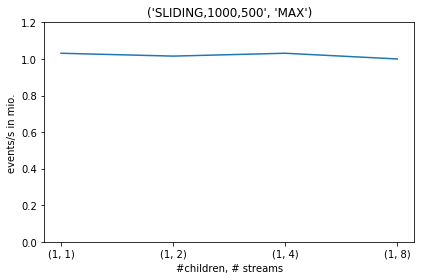

Benchmark ('SLIDING,1000,500', 'M_AVG')
[(1, 1), (1, 2), (1, 4), (1, 8)]
[1.007812, 1.0, 1.031248, 1.0]


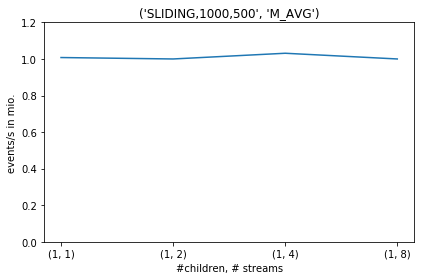

Benchmark ('SLIDING,1000,500', 'M_MEDIAN')
[(1, 1), (1, 2), (1, 4), (1, 8)]
[0.034687, 0.042656, 0.033748, 0.037496]


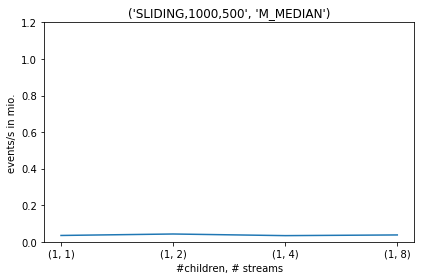

Benchmark ('TUMBLING,1000', 'MAX')
[(1, 1), (1, 2), (1, 4), (1, 8)]
[1.023437, 1.03125, 1.031248, 1.062496]


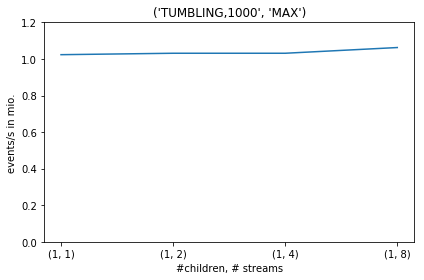

Benchmark ('TUMBLING,1000', 'M_AVG')
[(1, 1), (1, 2), (1, 4), (1, 8)]
[0.992187, 0.984374, 1.031248, 1.0]


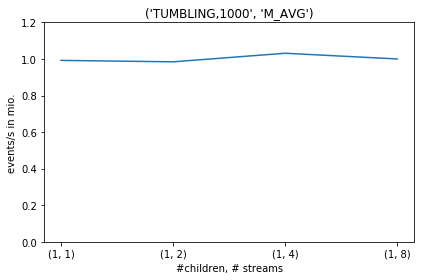

Benchmark ('TUMBLING,1000', 'M_MEDIAN')
[(1, 1), (1, 2), (1, 4), (1, 8)]
[0.028359, 0.024374, 0.026248, 0.03]


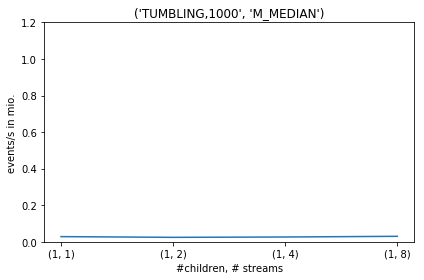

In [50]:
import matplotlib.pyplot as plt

def plot_single_child_throughputs(child_streams, throughputs, title):
    str_child_streams = [str(cs) for cs in child_streams]
    plt.plot(throughputs)
    plt.xticks(range(len(child_streams)), str_child_streams)
    plt.ylabel("events/s in mio.")
    plt.xlabel("#children, # streams")
    plt.title(title)
    plt.ylim(ymin=0, ymax=1.2)
    plt.show()
#     plt.savefig(f"/tmp/plots/single_child_{title[0].replace(',', '_')}_{title[1]}.png")
#     plt.close()

    
for benchmark, run_throughputs in sorted(MATRIX_TP.items()):
    print(f"Benchmark {benchmark}")
    bm_child_streams = []
    bm_throughputs = []
    for (num_children, num_streams), throughput in sorted(run_throughputs.items()):
        if num_children != 1:
            continue
        bm_child_streams.append((num_children, num_streams)) 
        bm_throughputs.append((num_streams * throughput) / 1_000_000)
    print(bm_child_streams)
    print(bm_throughputs)
    plot_single_child_throughputs(bm_child_streams, bm_throughputs, benchmark)

Benchmark ('SLIDING,1000,500', 'M_MEDIAN')
[(1, 1), (2, 2), (4, 4), (8, 8)]
[0.034687, 0.072186, 0.135936, 0.277496]


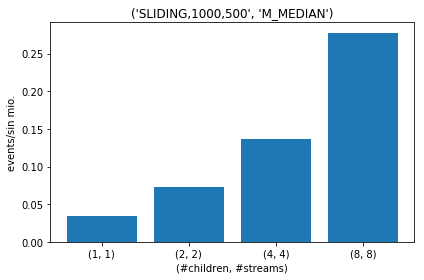

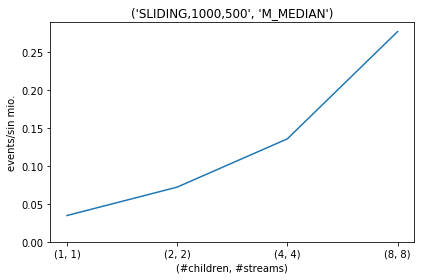

Benchmark ('TUMBLING,1000', 'M_MEDIAN')
[(1, 1), (2, 2), (4, 4), (8, 8)]
[0.028359, 0.0525, 0.105, 0.187496]


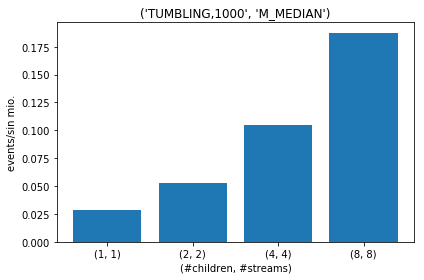

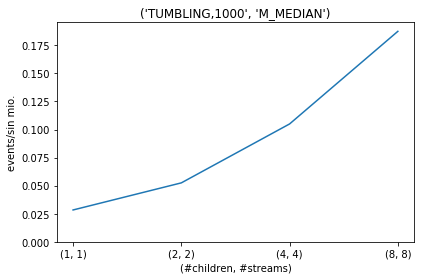

In [45]:
import matplotlib.pyplot as plt


def plot_multi_child_throghputs(child_streams, throughputs, title):
    plt.bar(range(len(throughputs)), throughputs)
    plt.ylabel("events/sin mio.")
    plt.xlabel("(#children, #streams)")
    plt.xticks(range(len(child_streams)), [f"({n_child}, {n_stream})" for n_child, n_stream in child_streams])
    plt.title(title)
    plt.ylim(ymin=0)
#     plt.savefig(f"/tmp/plots/{title[0].replace(',', '_')}_{title[1]}.png")
    plt.show()

    plt.plot(throughputs)
    plt.ylabel("events/sin mio.")
    plt.xlabel("(#children, #streams)")
    plt.xticks(range(len(child_streams)), [f"({n_child}, {n_stream})" for n_child, n_stream in child_streams])
    plt.title(title)
    plt.ylim(ymin=0)
    plt.show()

for benchmark, run_throughputs in sorted(MATRIX_TP.items()):
    print(f"Benchmark {benchmark}")
    bm_child_streams = []
    bm_throughputs = []
    for (num_children, num_streams), throughput in sorted(run_throughputs.items()):
        if num_children != num_streams:
            continue
        bm_child_streams.append((num_children, num_streams)) 
        bm_throughputs.append((num_streams * throughput) / 1_000_000)
    print(bm_child_streams)
    print(bm_throughputs)
    plot_multi_child_throghputs(bm_child_streams, bm_throughputs, benchmark)


Benchmark ('CONCURRENT,1,TUMBLING,1000', 'MAX')
{(1, 1): 1031250}
Benchmark ('CONCURRENT,1,TUMBLING,1000', 'M_MEDIAN')
{(1, 1): 37500}
Benchmark ('CONCURRENT,5,TUMBLING,1000', 'MAX')
{(1, 1): 992187}
Benchmark ('CONCURRENT,5,TUMBLING,1000', 'M_MEDIAN')
{(1, 1): 45234}
Benchmark ('CONCURRENT,10,TUMBLING,1000', 'MAX')
{(1, 1): 1023437}
Benchmark ('CONCURRENT,10,TUMBLING,1000', 'M_MEDIAN')
{(1, 1): 59296}
Benchmark ('CONCURRENT,50,TUMBLING,1000', 'MAX')
{(1, 1): 1039062}
Benchmark ('CONCURRENT,50,TUMBLING,1000', 'M_MEDIAN')
{(1, 1): 59296}
Benchmark ('CONCURRENT,100,TUMBLING,1000', 'MAX')
{(1, 1): 1000000}
Benchmark ('CONCURRENT,100,TUMBLING,1000', 'M_MEDIAN')
{(1, 1): 58593}
Benchmark ('CONCURRENT,500,TUMBLING,1000', 'MAX')
{(1, 1): 867187}
Benchmark ('CONCURRENT,500,TUMBLING,1000', 'M_MEDIAN')
{(1, 1): 17109}
Benchmark ('CONCURRENT,1000,TUMBLING,1000', 'MAX')
{(1, 1): 1992187}
Benchmark ('CONCURRENT,1000,TUMBLING,1000', 'M_MEDIAN')
{(1, 1): 59296}
Benchmark ('CONCURRENT,5000,TUMBLING,10

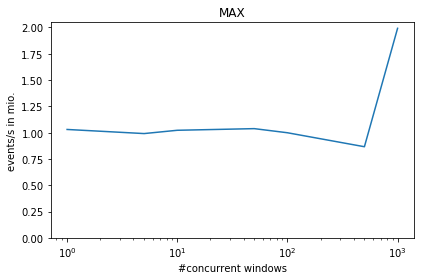

[(1, 0.0375), (5, 0.045234), (10, 0.059296), (50, 0.059296), (100, 0.058593), (500, 0.017109), (1000, 0.059296)]


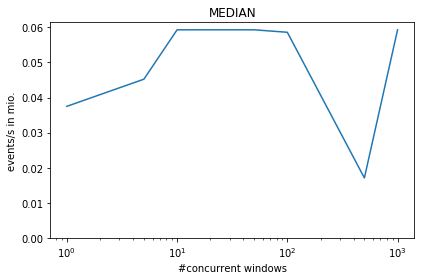

In [33]:
import matplotlib.pyplot as plt
from collections import defaultdict

def plot_concurrent_throughputs(num_windows, throughputs, title):
    print(list(zip(num_windows, throughputs)))
    plt.plot(num_windows, throughputs)
#     plt.xticks(range(num_windows))
    plt.ylabel("events/s in mio.")
    plt.xlabel("#concurrent windows")
    plt.title(title)
    plt.xscale("log")
    plt.ylim(ymin=0) #, ymax=1.2)
    plt.show()

    
bm_throughputs = defaultdict(list)
bm_num_windows = set()
for benchmark, run_throughputs in sorted(CONCURRENT_TP.items(), key=lambda x: int(x[0][0].split(",")[1])):
    print(f"Benchmark {benchmark}")
    print(run_throughputs)
    num_windows = int(benchmark[0].split(",")[1])
    bm_num_windows.add(num_windows)
    agg_fn = benchmark[1]
    for throughput in run_throughputs.values(): 
        bm_throughputs[agg_fn].append(throughput / 1_000_000)

print(bm_throughputs)    
plot_concurrent_throughputs(sorted(bm_num_windows)[:7], bm_throughputs["MAX"][:7], "MAX")
# plt.savefig(f"/tmp/plots/concurrent_max_tumbling.png")
# plt.close()

plot_concurrent_throughputs(sorted(bm_num_windows)[:7], bm_throughputs["M_MEDIAN"][:7], "MEDIAN")
# plt.savefig(f"/tmp/plots/concurrent_median_tumbling.png")
# plt.close()

# for agg_fn, tps in bm_throughputs.items():
#     plot_concurrent_throughputs(sorted(bm_num_windows), tps, agg_fn)